In [2]:
# 1. Import libraries and load data from cleaned CSV file
import pandas as pd

df = pd.read_csv('cleaned_bank.csv', sep=',')

In [3]:
#lets take a look at the first few rows of the dataset
df.columns

Index(['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'prior_contact', 'campaign_capped',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'po

In [4]:
#Lets do basic info check before EDA
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39328 entries, 0 to 39327
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39328 non-null  int64  
 1   previous                       39328 non-null  int64  
 2   emp.var.rate                   39328 non-null  float64
 3   cons.price.idx                 39328 non-null  float64
 4   cons.conf.idx                  39328 non-null  float64
 5   euribor3m                      39328 non-null  float64
 6   nr.employed                    39328 non-null  float64
 7   y                              39328 non-null  int64  
 8   prior_contact                  39328 non-null  int64  
 9   campaign_capped                39328 non-null  int64  
 10  job_blue-collar                39328 non-null  bool   
 11  job_entrepreneur               39328 non-null  bool   
 12  job_housemaid                  39328 non-null 

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prior_contact,campaign_capped,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False


Lets start doing some EDA on numerical features:

Below are some of the columns that will be used

Integers: age, previous, y, prior_contact, campaign_capped

Floats: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

In [5]:
#lets get some summary statistics for the numerical features
summary_num_cols = ['age', 'previous', 'y', 'prior_contact', 'campaign_capped','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[summary_num_cols].describe()

,age,previous,y,prior_contact,campaign_capped,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000
mean,40.123296,0.178677,0.116762,0.038268,2.307516,0.062614,93.577277,-40.499153,3.600014,5165.932799
std,10.462038,0.502933,0.321140,0.191845,1.558554,1.577317,0.584131,4.646164,1.742504,72.751951
min,17.000000,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,0.000000,0.000000,0.000000,2.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,0.000000,0.000000,0.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,7.000000,1.000000,1.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


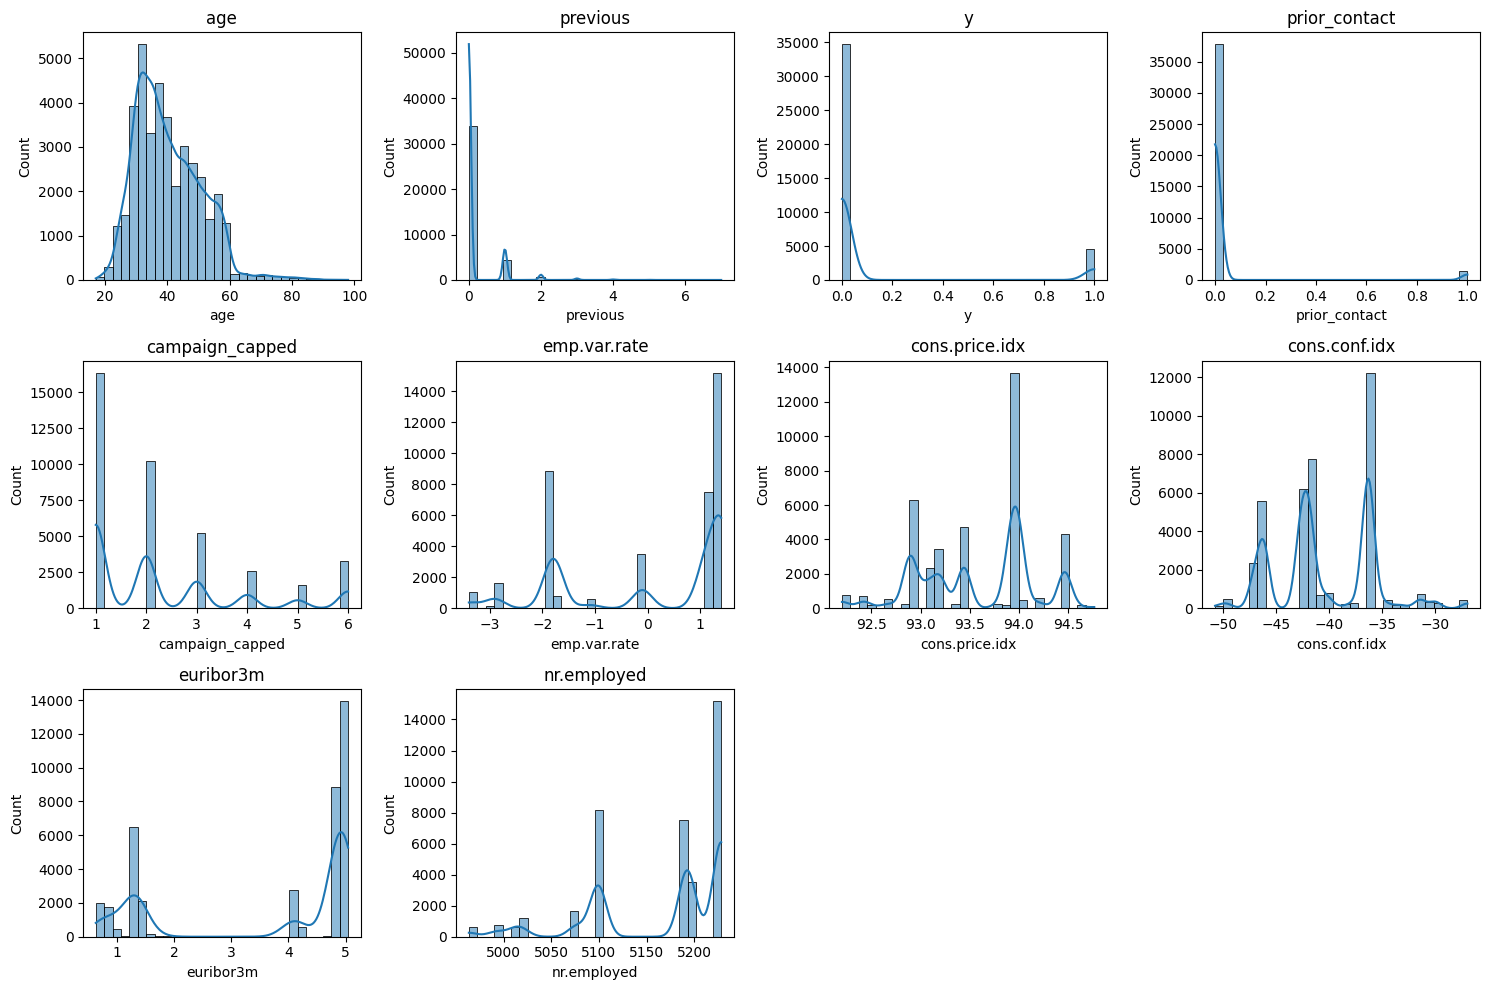

In [6]:
#Now lets do a distribution plot for the numerical features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(summary_num_cols): #enumerate function gives both index and column name
    plt.subplot(3,4,i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [7]:
#I want to create a blank to hold all the categorical features
categorical_cols = ['contact_telephone', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_unknown', 'default_yes', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_unknown', 'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'loan_unknown', 'loan_yes', 'marital_married', 'marital_single', 'marital_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


There are a lot of different categorical variables, lets group them logically into the following categories, then map them against target value y

Jobs (11 cols)

Marital (3)

Education (7)

Default, housing, loan (6)

Contact/month/day (13)

Poutcome (2)

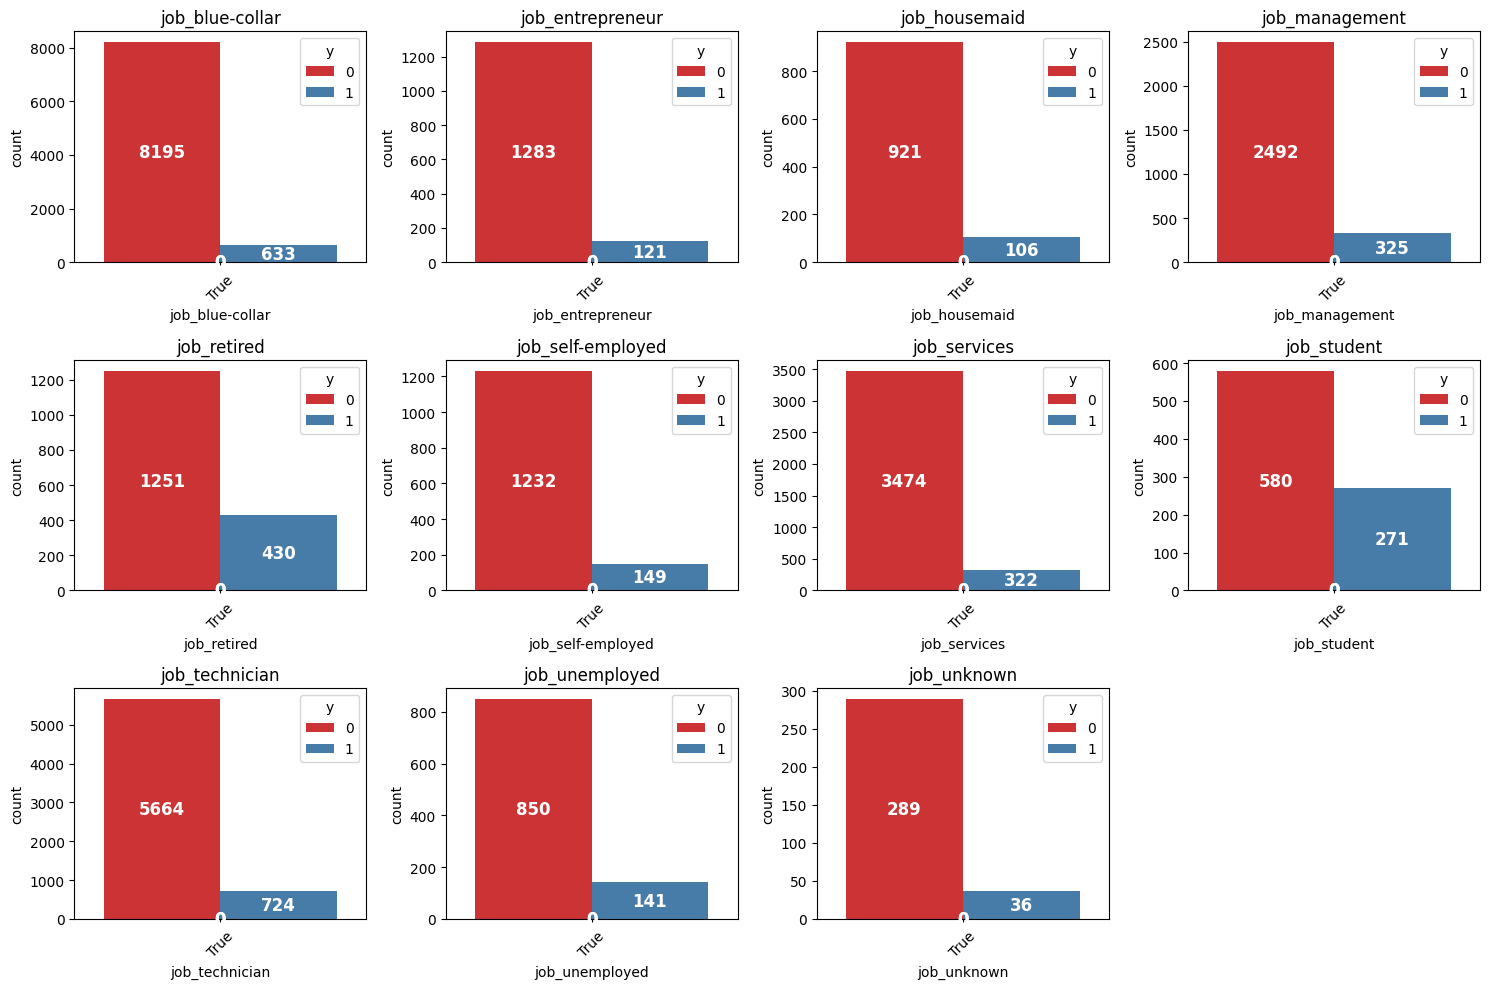

<Figure size 640x480 with 0 Axes>

In [8]:
#2 now I want to see job categorical features vs y
job_cols = [col for col in categorical_cols if col.startswith('job_')]

#lets start a barplot for the categorical features against the target variable 'y'
# we will start with categorical features that start with job, so we can see the distribution of jobs against the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(job_cols):  # limiting to first 10 for clarity
    plt.subplot(3, 4, i + 1)
    #filter only rows where job is true, since for one hot enconding that is all that is relavant
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x=col, hue='y', palette='Set1')
    plt.title(col)
    plt.xticks(rotation=45)

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold'
        )
    
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

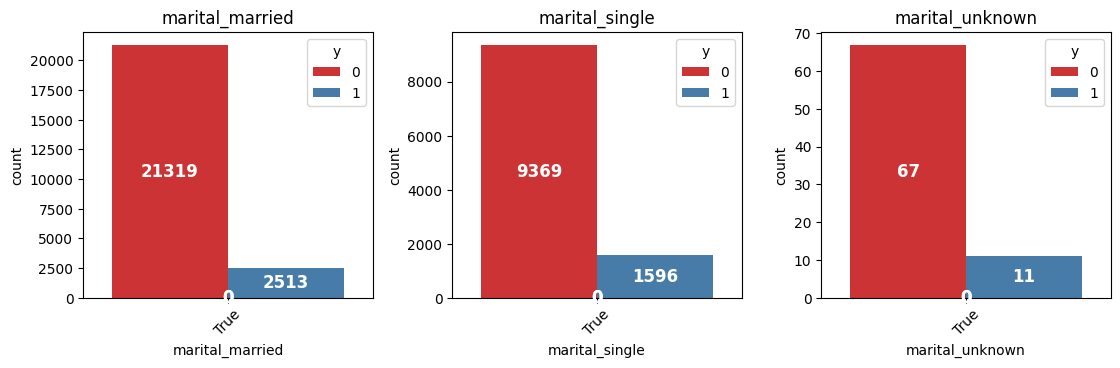

In [9]:
#2.) continued, map martial status against the target variable 'y
marital_cols = [col for col in categorical_cols if col.startswith('marital_')]

plt.figure(figsize=(15, 10))
for i, col in enumerate(marital_cols):
    plt.subplot(3, 4, i + 1)
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x = col, hue = 'y', palette ='Set1')
    plt.title(col)
    plt.xticks(rotation=45)


     # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold'
        )
plt.tight_layout()
plt.show()


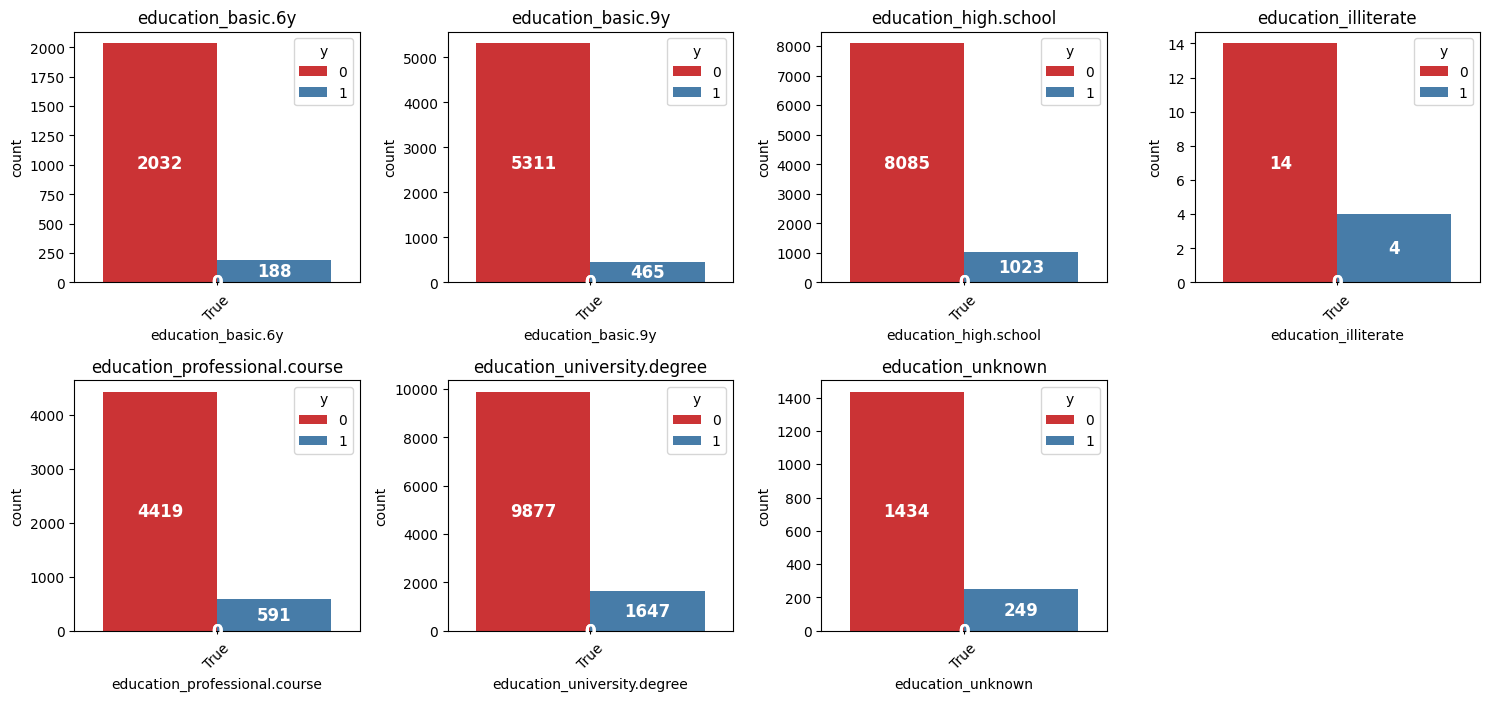

In [10]:
#2.) continued but for education features vs target variable 'y'
education_cols = [col for col in categorical_cols if col.startswith('education_')]
plt.figure(figsize=(15, 10))
for i, col in enumerate(education_cols):
    plt.subplot(3,4,i+1)
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x=col, hue='y', palette='Set1')
    plt.title(col)
    plt.xticks(rotation=45)


     # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold'
        )
plt.tight_layout()
plt.show()

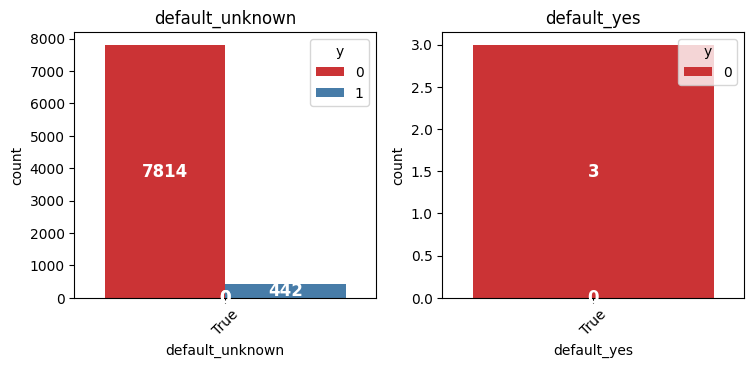

In [11]:
#2 continued, but default features vs target variable 'y'
default_cols = [col for col in categorical_cols if col.startswith('default_')]
plt.figure(figsize=(15, 10))
for i, col in enumerate(default_cols):
    plt.subplot(3, 4, i + 1)
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x=col, hue='y', palette='Set1')
    plt.title(col)
    plt.xticks(rotation=45)

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold'
        )
    
plt.tight_layout()
plt.show()

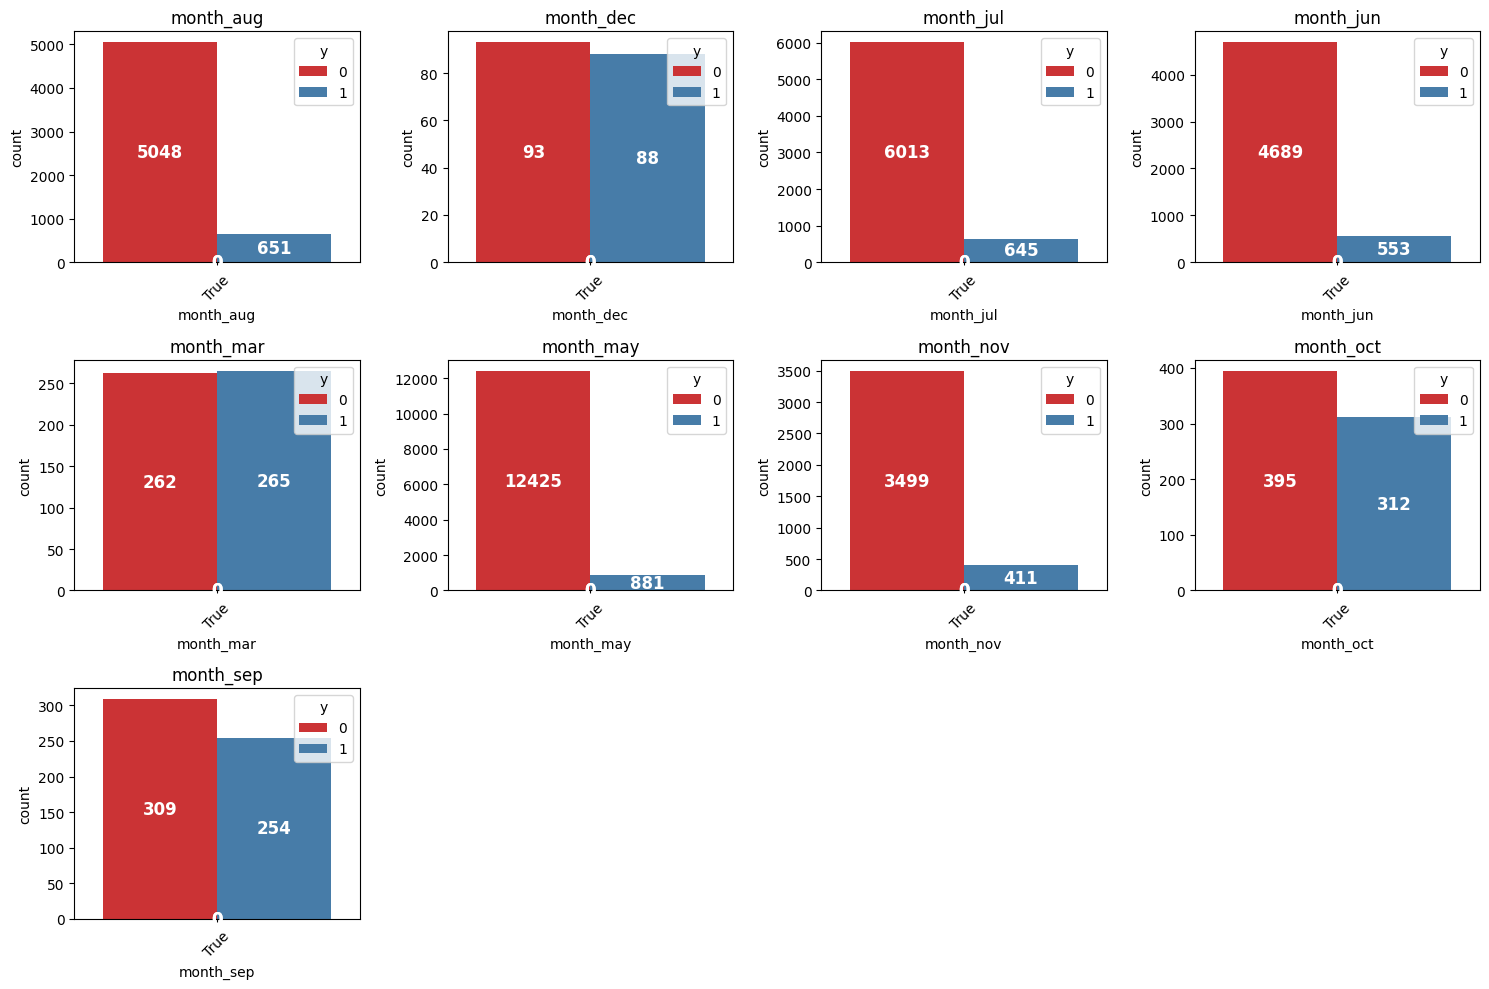

In [12]:
#2 continued, but for month features vs target variable 'y'
month_cols = [col for col in categorical_cols if col.startswith('month_')]  
plt.figure(figsize=(15, 10))
for i, col in enumerate(month_cols):    
    plt.subplot(3, 4, i + 1)
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x=col, hue='y', palette='Set1')
    plt.title(col)
    plt.xticks(rotation=45)
    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold'
        )
plt.tight_layout()
plt.show()

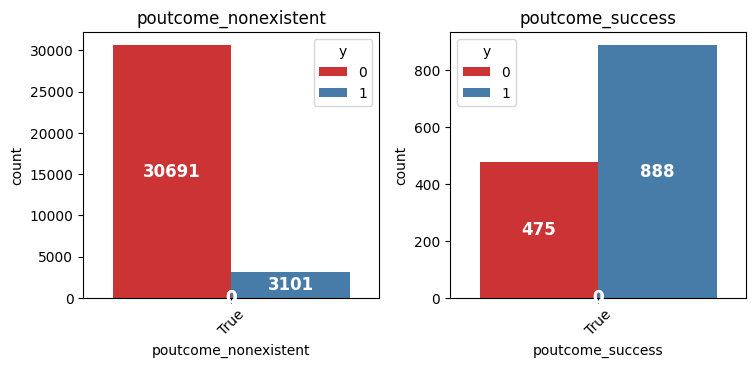

In [13]:
#2 continued but for poutcome features vs target variable 'y'
poutcome_cols = [col for col in categorical_cols if col.startswith('poutcome_')]
plt.figure(figsize=(15, 10))
for i, col in enumerate(poutcome_cols):
    plt.subplot(3, 4, i + 1)
    temp = df[df[col]]
    ax = sns.countplot(data=temp, x=col, hue='y', palette='Set1')
    plt.title(col)
    plt.xticks(rotation=45)
    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height * 0.5,                   # Y position: halfway up the bar (change as needed)
            int(height),                   # Text to display
            ha='center', va='center',     # Center alignment
            color='white', fontsize=12,
            fontweight='bold')
        

plt.tight_layout()
plt.show()

Next, lets take a look at a correlation heatmaps for numerical features.

The numerical features are as follows:

numerical_features = [
    'age',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

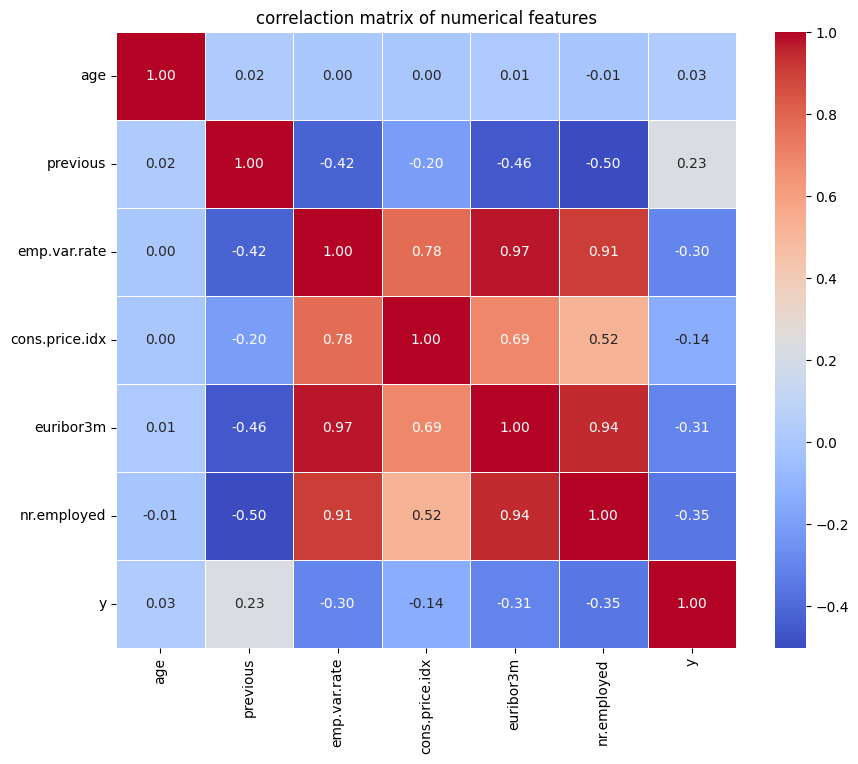

In [16]:
#EDA step 3: Correlation matrix for numerical features

#first thing is first, lets numerical features
numerical_features = ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y']

#lets create a correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlaction matrix of numerical features')
plt.show()

### 🔍 Observations: Correlation with Target Variable (`y`)

From the correlation matrix, we observe the following relationships between the numerical features and the target variable `y` (whether the client subscribed to a term deposit):

- `nr.employed`: **-0.35**  
  ↳ Clients were less likely to subscribe when the number of employees was higher.

- `euribor3m`: **-0.31**  
  ↳ Lower interest rates (euribor) were associated with a higher likelihood of subscription.

- `emp.var.rate`: **-0.30**  
  ↳ Lower employment variation rates correlated with more term deposit subscriptions.

These negative correlations suggest that **clients were more likely to subscribe to a term deposit during periods of economic downturn** or uncertainty.

⚠️ **Note on Multicollinearity**:
- `euribor3m`, `emp.var.rate`, and `nr.employed` are all highly positively correlated with one another (e.g., 0.91–0.97).
- This could introduce multicollinearity in modeling, so consider **removing one or two of these** if using linear models.

✅ **Next steps**:
- Use `.sort_values()` on the correlation with `y` to rank features.
- Consider visualizing key features with boxplots or histograms segmented by `y`.
- Explore interaction terms or feature engineering if building a predictive model.
